У нас есть еще один вопрос, на который вам нужно ответить: когда наши пользователи обычно выполняют лабораторные работы: ночью, утром, днем ​​или вечером? И как это изменилось со временем?

In [1]:
import pandas as pd
import sqlite3

In [2]:
connection = sqlite3.connect('data/checking-logs.sqlite')

In [3]:
checker_query = '''
SELECT 
    date(timestamp) AS date,
    time(timestamp) AS time,
    uid
FROM checker
WHERE uid NOT LIKE 'admin_%'
'''
checker_data = pd.read_sql(checker_query, connection)
checker_data

,date,time,uid
0,2020-04-17,05:19:02,user_4
1,2020-04-17,05:22:35,user_4
2,2020-04-17,05:22:45,user_4
3,2020-04-17,05:34:14,user_4
4,2020-04-17,05:34:24,user_4
...,...,...,...
3202,2020-05-21,20:19:06,user_1
3203,2020-05-21,20:22:41,user_1
3204,2020-05-21,20:22:41,user_1
3205,2020-05-21,20:37:00,user_1


In [4]:
def categorize_time_of_day(time_str):
    hour = int(time_str.split(':')[0])
    if 0 <= hour <= 3:
        return 'night'
    elif 4 <= hour <= 9:
        return 'morning'
    elif 10 <= hour <= 16:
        return 'afternoon'
    else:
        return 'evening'

In [5]:
checker_data['time_of_day'] = checker_data['time'].apply(categorize_time_of_day)

In [6]:
checker_data

,date,time,uid,time_of_day
0,2020-04-17,05:19:02,user_4,morning
1,2020-04-17,05:22:35,user_4,morning
2,2020-04-17,05:22:45,user_4,morning
3,2020-04-17,05:34:14,user_4,morning
4,2020-04-17,05:34:24,user_4,morning
...,...,...,...,...
3202,2020-05-21,20:19:06,user_1,evening
3203,2020-05-21,20:22:41,user_1,evening
3204,2020-05-21,20:22:41,user_1,evening
3205,2020-05-21,20:37:00,user_1,evening


In [7]:
checker_counts = checker_data.groupby(['date', 'time_of_day']).size().unstack(fill_value=0)
checker_counts

time_of_day,afternoon,evening,morning,night
date,,,,
2020-04-17,10,0,13,0
2020-04-18,33,35,1,0
2020-04-19,16,11,4,2
2020-04-20,12,13,0,0
2020-04-21,0,25,0,0
2020-04-22,4,24,0,0
2020-04-23,15,20,6,2
2020-04-24,4,12,0,0
2020-04-25,33,49,21,1


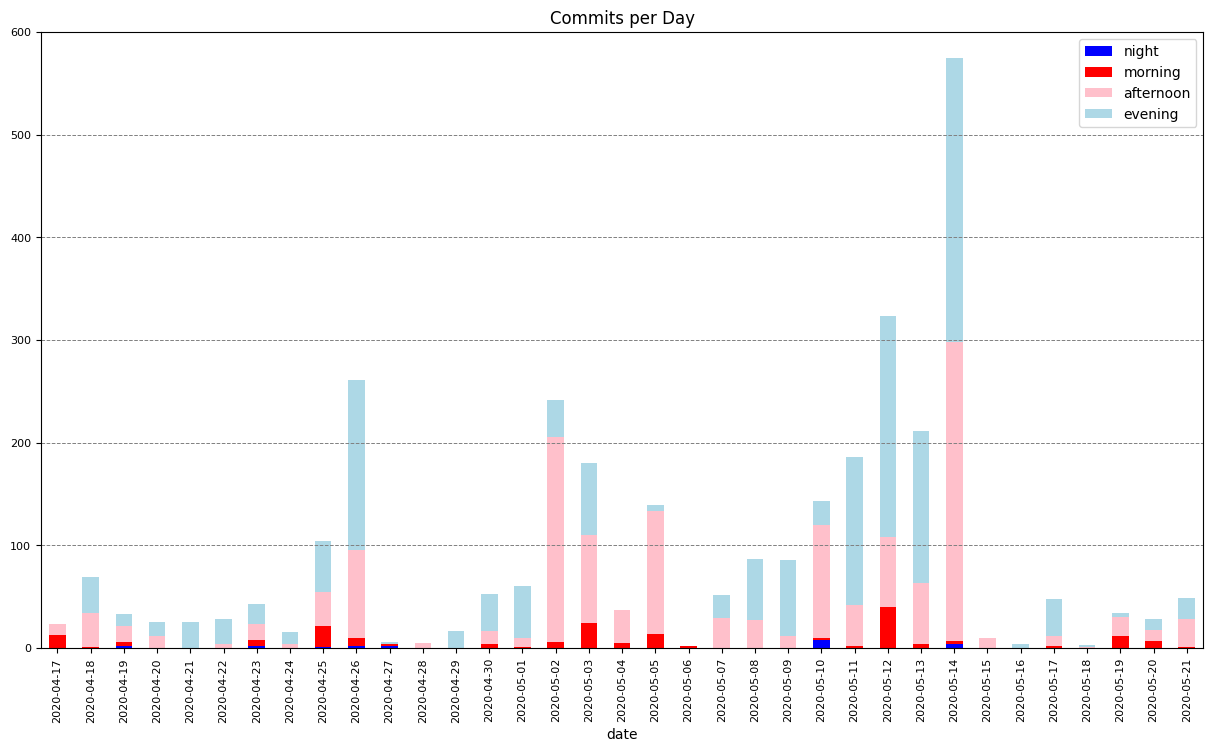

In [8]:
graph = checker_counts[['night', 'morning', 'afternoon', 'evening']].plot(
    kind='bar',
    stacked=True,
    figsize=(15, 8),
    fontsize=8,
    color=['blue', 'red', 'pink', 'lightblue'],
    title='Commits per Day'
)
graph.set_ylim(0, 600)
y_ticks = graph.get_yticks()
for y in y_ticks:
    graph.axhline(y=y, color='gray', linestyle='--', linewidth=0.7)
graph.set_xlabel('date')
graph.legend(loc='upper right')

In [9]:
connection.close()

Когда наши пользователи обычно выполняют лабораторные работы: ночью, утром, днем ​​или вечером?

In [10]:
time_of_day_counts = checker_counts.sum()
most_common_periods = time_of_day_counts.nlargest(2).index.tolist()
print(f'2 самых распространенных периода это {most_common_periods[0]} и {most_common_periods[1]}')

2 самых распространенных периода это evening и afternoon


В какой день наибольшее количество коммитов и в то же время количество коммитов вечером больше, чем днем?

In [11]:
evening_greater_than_afternoon_days = checker_counts[
    checker_counts['evening'] > checker_counts['afternoon']
    ]
max_commits_day = evening_greater_than_afternoon_days.sum(axis=1).idxmax()
print(f'{max_commits_day} - в этот день коммитов вечером больше, чем днем, а также наибольшее количество коммитов суммарно')

2020-05-12 - в этот день коммитов вечером больше, чем днем, а также наибольшее количество коммитов суммарно
